# Plot variables related to anthropogenic heat
- This script is used to plot variables related to anthropogenic heat from simulations;
- Simulations: CNTL, TRAF at FR-Capitole.

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import string
import matplotlib.dates as mdates
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
START = ['1994']
END = ['2005']
zone = [1]
start_date = ['2004-02-20T00:30:00']
end_date = ['2005-02-28T22:30:00']
mid_date = [['2004-06-01T00:00:00', '2004-12-01T00:00:00']]
case_list = ['cntl', 'traffic']
df = pd.read_csv('./data_for_figure/FR-Capitole.csv')
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df['year-month'] = df['time'].dt.strftime('%Y-%m')
df.head()

,time,month,hour,year,minute,diurnal,URBAN_AC,URBAN_HEAT,VENTILATION,WASTEHEAT,FGR_U,TRAFFICFLUX,AHF,case,year-month
0,2004-02-20 01:00:00,2,1,2004,0,01:00,0.0,21.110060,5.942730,4.155546,-90.72937,0.0,25.265606,cntl,2004-02
1,2004-02-20 01:30:00,2,1,2004,30,01:30,0.0,21.637337,5.791717,4.222012,-79.33860,0.0,25.859348,cntl,2004-02
2,2004-02-20 02:00:00,2,2,2004,0,02:00,0.0,22.147747,5.939824,4.327467,-70.29194,0.0,26.475214,cntl,2004-02
3,2004-02-20 02:30:00,2,2,2004,30,02:30,0.0,22.663204,6.076488,4.429549,-68.21493,0.0,27.092754,cntl,2004-02
4,2004-02-20 03:00:00,2,3,2004,0,03:00,0.0,23.162970,6.222219,4.532641,-68.52138,0.0,27.695610,cntl,2004-02


In [10]:
label_list = ['CNTL', 'TRAF']
linewidth = 0.5
#lc1 = '#d95f02'
#lc2 = '#7570b3'
lc1 = '#1f78b4'
lc2 = '#e31a1c'
lc = [lc1, lc2]
#diff_lc = '#b60bc1'
#diff_lc = '#e7298a'
diff_lc = '#1b9e77'
mid_time = ['2004-06-01T00:00:00', '2004-12-01T00:00:00']
GRIDNAME = 'FR-Capitole'
labelfont = 6
labelcolor = '#6b6b6b'
handletextpad = 0.5
metric = ['Monthly mean', 'Hourly mean']
#var_list = ['URBAN_AC', 'URBAN_HEAT', 'VENTILATION', 'WASTEHEAT', 'TRAFFICFLUX', 'AHF']
#sequence2 = ['$Q_{ac}$', '$Q_{heat}$', '$Q_{v}$', '$Q_{w}$', '$Q_{traffic}$', 'AHF']
var_list = ['AHF', 'TRAFFICFLUX', 'URBAN_AC', 'URBAN_HEAT', 'VENTILATION', 'FGR_U']
sequence2 = ['AHF', r'$Q_\mathrm{traffic}$', r'$Q_\mathrm{ac}$', r'$Q_\mathrm{heat}$',  
              r'$Q_\mathrm{v}$', r'$Q_\mathrm{g}$']
xwidth = 0.5
padding = 4
pad = 1
length = 2
#ax_ymax_list = [2, 40, 8, 8, 40, 80]
#ax2_ymax_list = [0.12, 0.04,  1, -0.4,  0.2, 0.05,   0.2, -0.08, 22.4, 40, 23, 40]
#ax2_ymin_list = [0,       0, -3, -0.8, -0.6, -0.15, -0.6, -0.16,     22, 0, 19, 0]
ax_ymax_list = [60,      40,        0.4,         30,        6,        150]
ax2_ymax_list = [23, 40, 22.5, 40,  0.08, 0.04,  1,  -0.4,  0.2, 0.2,   3,   15]
ax2_ymin_list = [19,  0,  22.1, 0,  0,       0,  -3, -0.8, -0.6, -0.2 ,  -1,   -5]
marker = 'o'
markersize = 1

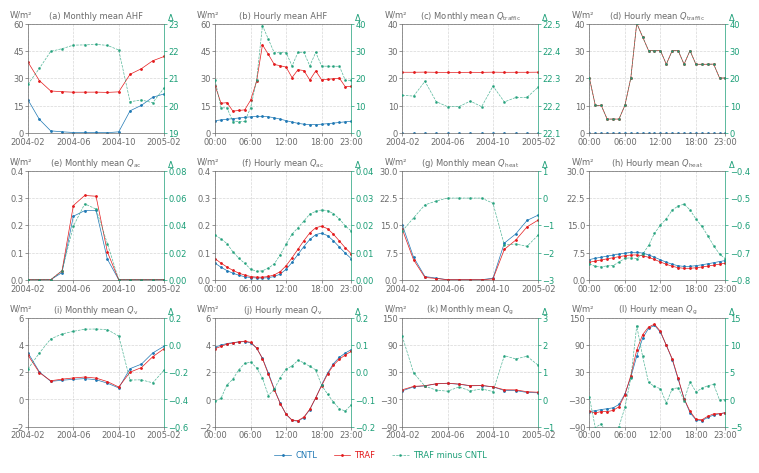

In [12]:
fig, axs = plt.subplots(3, 4, figsize=(7.5, 4.5))
ax = axs.flatten()
for i in range(12):
    var_index = i // 2
    var = var_list[var_index]
    ax2 = ax[i].twinx()
    if var == 'VENTILATION': 
        ax_ymin = -2
    elif var == 'FGR_U':
        ax_ymin = -90   
    else:
        ax_ymin = 0
    ax_ymax = ax_ymax_list[var_index]
    ax2_ymin = ax2_ymin_list[i]
    ax2_ymax = ax2_ymax_list[i]
    ax[i].set_ylim([ax_ymin, ax_ymax])
    ax2.set_ylim([ax2_ymin, ax2_ymax])
    ax[i].set_yticks([ax_ymin, ax_ymin + (ax_ymax - ax_ymin)/4, (ax_ymin + ax_ymax)/2, ax_ymax - (ax_ymax - ax_ymin)/4, ax_ymax])
    ax2.set_yticks([ax2_ymin, ax2_ymin + (ax2_ymax - ax2_ymin)/4, (ax2_ymin + ax2_ymax)/2, ax2_ymax - (ax2_ymax - ax2_ymin)/4, ax2_ymax])
    for c, case in enumerate(case_list):
        df_case = df[df['case'] == case]
        diurnal_mean = df_case[[var, 'hour']].groupby('hour').mean(numeric_only=True)
        numeric_cols = df_case.columns
        cols = numeric_cols.drop(['time', 'hour', 'minute','diurnal', 'month', 'year', 'case'])
        monthly_mean = df_case[cols].groupby(['year-month']).mean().reset_index()
        if i%2==0:
            ax[i].plot(monthly_mean['year-month'], monthly_mean[var], label=label_list[c], color=lc[c], linewidth=linewidth,
                       marker=marker, markersize=markersize)
            xticks = [monthly_mean['year-month'].iloc[0], monthly_mean['year-month'].iloc[4], monthly_mean['year-month'].iloc[8], monthly_mean['year-month'].iloc[-1]]    
            ax[i].set_xticks(xticks)
            ax[i].set_xlim([monthly_mean['year-month'].iloc[0],  monthly_mean['year-month'].iloc[-1]])
        elif i%2==1: 
            ax[i].plot(diurnal_mean.index, diurnal_mean[var], label=label_list[c], color=lc[c], linewidth=linewidth,
                       marker=marker, markersize=markersize)
            #ax[i].fill_between(diurnal_mean.index, diurnal_5[var], diurnal_95[var], alpha=0.1, color=lc[c],  edgecolor='none', label=label_list[c] + ': 5%-95%')
            ax[i].set_xticks([0, 6, 12, 18, 23])
            ax[i].set_xticklabels(['00:00', '06:00', '12:00', '18:00', '23:00'])
            ax[i].set_xlim([diurnal_mean.index[0], diurnal_mean.index[-1]])
        ax[i].set_title(f'({string.ascii_lowercase[i]}) {metric[i%2]} {sequence2[i//2]}',fontsize=labelfont,color=labelcolor, pad = padding)   
        ax[i].set_ylabel('W/m²',labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
        ax[i].yaxis.set_label_coords(-0.05, 1.05)
        ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        for s, spine in enumerate(ax[i].spines.values()):
            spine.set_linewidth(xwidth)
            spine.set_edgecolor([labelcolor, diff_lc, labelcolor, labelcolor][s])       
        ax[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    df_cntl = df[df['case'] == 'cntl']
    df_traf = df[df['case'] == 'traffic']
    delta = pd.DataFrame({var: df_traf[var].values - df_cntl[var].values})
    
    delta['hour'] = df_cntl['hour']
    delta['year-month'] = df_cntl['year-month']
    delta_monthly_mean = delta[[var, 'year-month']].groupby('year-month').mean(numeric_only=True)[var]
    delta_diurnal_mean = delta[[var, 'hour']].groupby('hour').mean(numeric_only=True)[var]
    if i%2==0:
       ax2.plot(monthly_mean['year-month'], delta_monthly_mean.values, label='TRAF minus CNTL', 
                     color=diff_lc, linewidth=linewidth, linestyle='--', alpha=0.75, marker=marker, markersize=markersize) 
    elif i%2==1:
       ax2.plot(diurnal_mean.index, delta_diurnal_mean.values, label='TRAF minus CNTL', color=diff_lc, 
                linewidth=linewidth, linestyle='--', alpha=0.75, marker=marker, markersize=markersize)
    for spin in ax2.spines.values():
        spin.set_visible(False)   
    ax2.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelcolor=diff_lc, color=diff_lc,
                    labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax2.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=False)    
    ax2.set_ylabel(r'$\Delta$',labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=diff_lc)
    ax2.yaxis.set_label_coords(1.05, 1.115)  
plt.subplots_adjust(left=0.03, right=0.96, bottom=0.075, top=0.97, wspace=0.375, hspace= 0.35)
lines1, labels1 = ax[1].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=6)
for i, text in enumerate(legend.get_texts()):
    text.set_color((lc + [diff_lc])[i])
#plt.suptitle('Timeseries and diurnal plots for ' + GRIDNAME, fontsize=labelfont+2, color=labelcolor,x=0.5, y=0.99, ha='center', va='top')
fig.savefig(f'{GRIDNAME}_ahf.png', dpi=300)            
fig.savefig(f'{GRIDNAME}_ahf.pdf', dpi=600)

In [61]:
diurnal_mean.index[0]

np.int64(0)

# Description

In [4]:
df_cntl = df[df['case'] == 'cntl'].reset_index(drop=True)
df_traf = df[df['case'] == 'traffic'].reset_index(drop=True)
df_traf.head()

,time,month,hour,year,minute,diurnal,URBAN_AC,URBAN_HEAT,VENTILATION,WASTEHEAT,FGR_U,TRAFFICFLUX,AHF,case
0,2004-02-20 01:00:00,2,1,2004,0,01:00,0.0,21.110060,5.942730,4.155546,-85.744470,10.045211,35.310818,traffic
1,2004-02-20 01:30:00,2,1,2004,30,01:30,0.0,21.611689,5.791717,4.222012,-73.857150,10.045211,35.878910,traffic
2,2004-02-20 02:00:00,2,2,2004,0,02:00,0.0,22.078463,5.902640,4.322338,-64.099690,10.045211,36.446011,traffic
3,2004-02-20 02:30:00,2,2,2004,30,02:30,0.0,22.553452,5.978613,4.415692,-61.218666,10.045211,37.014355,traffic
4,2004-02-20 03:00:00,2,3,2004,0,03:00,0.0,23.007513,6.074349,4.510690,-64.261790,5.022605,32.540810,traffic


In [51]:
df_cntl['URBAN_HEAT'].max()

np.float64(39.887886)

In [ ]:
df_traf

In [82]:
df_cntl_ahf = df[(df['case']=='cntl') & (df['time'] < pd.to_datetime('2005-02-20 01:00:00'))]['AHF']
print(df_cntl_ahf.mean().item())

6.246583797263199


In [79]:
df_traf_ahf = df[(df['case']=='traffic') & (df['time'] < pd.to_datetime('2005-02-20 01:00:00'))]
df_traf_ahf.set_index('time', inplace=True)
df_traf_ahf.head()

,month,hour,year,minute,diurnal,URBAN_AC,URBAN_HEAT,VENTILATION,WASTEHEAT,FGR_U,TRAFFICFLUX,AHF,case
time,,,,,,,,,,,,,
2004-02-20 01:00:00,2,1,2004,0,01:00,0.0,21.110060,5.942730,4.155546,-85.744470,10.045211,35.310818,traffic
2004-02-20 01:30:00,2,1,2004,30,01:30,0.0,21.611689,5.791717,4.222012,-73.857150,10.045211,35.878910,traffic
2004-02-20 02:00:00,2,2,2004,0,02:00,0.0,22.078463,5.902640,4.322338,-64.099690,10.045211,36.446011,traffic
2004-02-20 02:30:00,2,2,2004,30,02:30,0.0,22.553452,5.978613,4.415692,-61.218666,10.045211,37.014355,traffic
2004-02-20 03:00:00,2,3,2004,0,03:00,0.0,23.007513,6.074349,4.510690,-64.261790,5.022605,32.540810,traffic


In [77]:
print(df_traf_ahf['AHF'].mean().item())

27.70585140328047


In [81]:
print(df_traf_ahf['AHF'].idxmax(), df_traf_ahf['AHF'].max())

2005-01-28 08:00:00 85.53157043457031


In [7]:
df[(df['case']=='traffic')].max()

time           2005-02-28 23:00:00
month                           12
hour                            23
year                          2005
minute                          30
diurnal                      23:30
URBAN_AC                  2.581526
URBAN_HEAT               38.362766
VENTILATION              10.164422
WASTEHEAT                 7.672553
FGR_U                     442.8739
TRAFFICFLUX              57.570263
AHF                       85.53157
case                       traffic
dtype: object

In [11]:
df_traf_traffic = df[df['case']=='traffic']['TRAFFICFLUX']
print(df_traf_traffic.mean().item())

17997    10.045211
17998    10.045211
17999    10.045211
18000    10.045211
18001     5.022605
Name: TRAFFICFLUX, dtype: float64

In [37]:
var = 'VENTILATION'
monthly_mean_traf = df_traf[var].rolling(window=336, min_periods=48).mean()
monthly_mean_cntl = df_cntl[var].rolling(window=336, min_periods=48).mean()
(monthly_mean_traf - monthly_mean_cntl).max()

np.float64(0.146645818153869)

In [56]:
var = 'TRAFFICFLUX'
df_traf_traffic = df[df['case']=='traffic'][[var, 'time']]
df_traf_traffic['time'] = pd.to_datetime(df_traf_traffic['time'])
df_traf_traffic['date'] = df_traf_traffic['time'].dt.date
df_traf_traffic['date'] = pd.to_datetime(df_traf_traffic['date'])
df_traf_traffic_daily = df_traf_traffic[['date', var]].groupby('date').mean()
df_traf_traffic_daily

,TRAFFICFLUX
date,
2004-02-20,22.277695
2004-02-21,22.188113
2004-02-22,22.196962
2004-02-23,22.183902
2004-02-24,22.183175
...,...
2005-02-24,22.218057
2005-02-25,22.183175
2005-02-26,22.183178


<Axes: xlabel='date'>

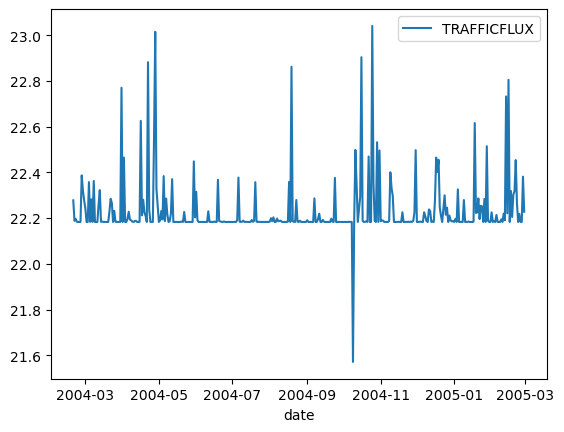

In [48]:
df_traf_traffic_daily.plot()

In [49]:
print(df_traf_traffic_daily.idxmin(), df_traf_traffic_daily.min(), 
      df_traf_traffic_daily.idxmax(), df_traf_traffic_daily.max())

TRAFFICFLUX    2004-10-09
dtype: object TRAFFICFLUX    21.571203
dtype: float64 TRAFFICFLUX    2004-10-25
dtype: object TRAFFICFLUX    23.040239
dtype: float64


In [65]:
ds_atm = xr.open_dataset(f'{home_path}0_lcz_sp/UrbanPlumber/datm_files/FR-Cap/CLM1PT_data/CTSM_DATM_FR-Cap_1994-2005.nc') 
ds_atm

<xarray.Dataset> Size: 21MB
Dimensions:                             (time: 195697, y: 1, x: 1)
Coordinates:
  * time                                (time) datetime64[ns] 2MB 1994-01-01 ...
  * x                                   (x) int64 8B 1
  * y                                   (y) int64 8B 1
Data variables: (12/50)
    Prectmms                            (time, y, x) float64 2MB ...
    Wind                                (time, y, x) float64 2MB ...
    Zbot                                (time, x, y) float64 2MB ...
    LWdown                              (time, y, x) float64 2MB ...
    LWdown_qc                           (time) int8 196kB ...
    PSurf                               (time, y, x) float64 2MB ...
    ...                                  ...
    topsoil_clay_fraction               (y, x) float64 8B ...
    topsoil_sand_fraction               (y, x) float64 8B ...
    tree_area_fraction                  (y, x) float64 8B ...
    tree_mean_height                    (y, x) float64 8B ...
    wall_to_plan_area_ratio             (y, x) float64 8B ...
    water_area_fraction                 (y, x) float64 8B ...
Attributes: (12/24)
    title:                      URBAN-PLUMBER forcing data for FR-Capitole
    summary:                    Observed and ERA5-derived surface meteorologi...
    sitename:                   FR-Capitole
    long_sitename:              Capitole district, Toulouse, France
    version:                    v1
    conventions:                ALMA+CF.rev13
    ...                         ...
    date_created:               2021-05-27 12:16:04
    other_references:           ERA5: Copernicus Climate Change Service (C3S)...
    acknowledgements:           Contains modified Copernicus Climate Change S...
    comment:                    Observation height varied depending on windsp...
    history:                    Thu May 27 09:02:55 2021: ncatted -a calendar...
    NCO:                        netCDF Operators version 4.7.9 (Homepage = ht...

In [ ]:
ds_atm_rain = ds_atm['Rainf'].sel(time=slice('2004-02-20', '2005-02-28'))
ds_atm_rain

In [62]:
df_rain = ds_atm_rain.to_dataframe().reset_index()
df_rain.set_index('time', inplace=True)
print(df_rain['Rainf'].idxmax(), df_rain['Rainf'].max())

2004-10-09 17:00:00 0.01817583333333333


In [66]:
ds_atm_snow = ds_atm['Snowf'].sel(time=slice('2004-02-20', '2005-02-28'))
ds_atm_snow

<xarray.DataArray 'Snowf' (time: 18000, y: 1, x: 1)> Size: 72kB
[18000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 144kB 2004-02-20 ... 2005-02-28T23:30:00
  * x        (x) int64 8B 1
  * y        (y) int64 8B 1
Attributes:
    long_name:            Snowfall rate (positive downward)
    standard_name:        snowfall_flux
    units:                kg/m2/s
    ancillary_variables:  Snowf_qc

In [69]:
df_snow = ds_atm_snow.to_dataframe().reset_index()
df_snow.set_index('time', inplace=True)
print(df_snow['Snowf'].idxmax(), df_snow['Snowf'].max())

2004-02-20 00:00:00 0.0


In [43]:
case = 'traffic'
ds_traffic = xr.open_dataset(f'{home_path}0_urban_traffic/archive/FR-Cap_{case}/lnd/hist/FR-Cap_{case}.clm2.h0.2004-02-20-03600.nc')
df_speed = ds_traffic['VEHICLE_SPEED'][:,0].to_dataframe().reset_index()
df_speed['time'] = pd.to_datetime(df_speed['time']) 
df_speed['time'] = df_speed['time'].dt.round('min').dt.ceil('min')
df_speed.set_index('time', inplace=True)
df_speed

,VEHICLE_SPEED
time,
2004-02-20 01:00:00,11.1
2004-02-20 01:30:00,11.1
2004-02-20 02:00:00,11.1
2004-02-20 02:30:00,11.1
2004-02-20 03:00:00,11.1
...,...
2005-02-28 21:00:00,11.1
2005-02-28 21:30:00,11.1
2005-02-28 22:00:00,11.1


<Axes: xlabel='time'>

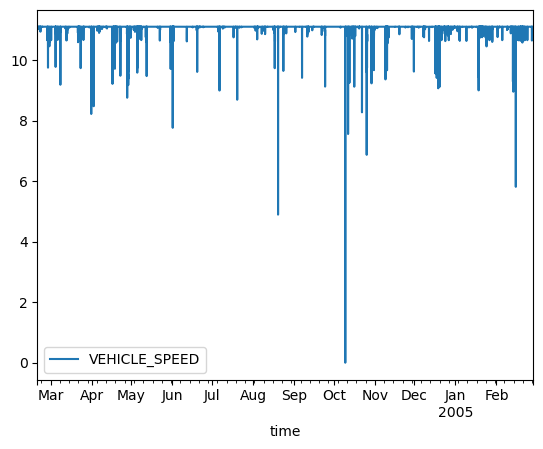

In [44]:
df_speed.plot()

In [45]:
print(df_speed.idxmin(), df_speed.min())

VEHICLE_SPEED   2004-10-09 17:00:00
dtype: datetime64[ns] VEHICLE_SPEED    0.0
dtype: float32


In [46]:
print(df_speed.idxmax(), df_speed.max())

VEHICLE_SPEED   2004-02-20 01:00:00
dtype: datetime64[ns] VEHICLE_SPEED    11.1
dtype: float32


Text(0.5, 1.0, 'Traffic Flux')

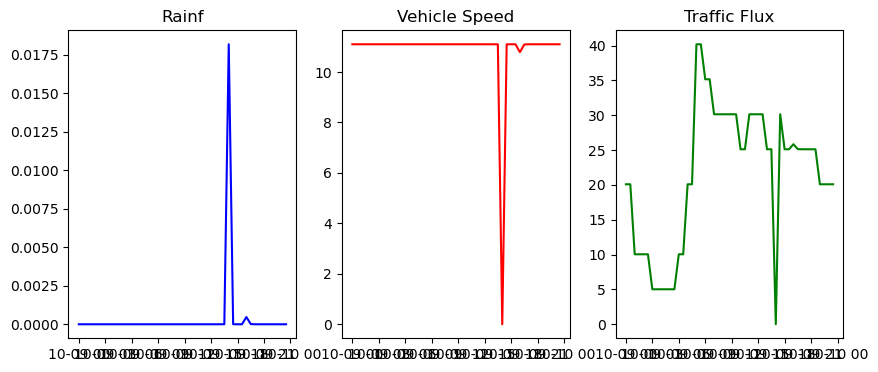

In [61]:
# 2004-10-09
df_rain_2004_10_09 = df_rain.loc['2004-10-09']
df_speed_2004_10_09 = df_speed.loc['2004-10-09']
df_traffic = df_traf_traffic[['time', 'TRAFFICFLUX']].set_index('time')
df_traffic_flux_2004_10_09 = df_traffic.loc['2004-10-09']
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].plot(df_rain_2004_10_09.index, df_rain_2004_10_09['Rainf'], color='blue', label='Rainf')
ax[0].set_title('Rainf')
ax[1].plot(df_speed_2004_10_09.index, df_speed_2004_10_09['VEHICLE_SPEED'], color='red', label='Vehicle Speed')
ax[1].set_title('Vehicle Speed')
ax[2].plot(df_traffic_flux_2004_10_09.index, df_traffic_flux_2004_10_09['TRAFFICFLUX'], color='green', label='Traffic Flux')
ax[2].set_title('Traffic Flux')

Text(0.5, 1.0, 'Traffic Flux')

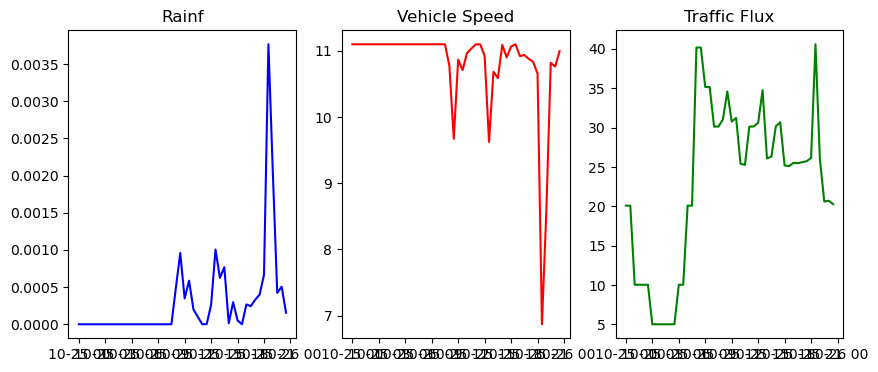

In [63]:
# 2004-10-25
df_rain_2004_10_25 = df_rain.loc['2004-10-25']
df_speed_2004_10_25 = df_speed.loc['2004-10-25']
df_traffic = df_traf_traffic[['time', 'TRAFFICFLUX']].set_index('time')
df_traffic_flux_2004_10_25 = df_traffic.loc['2004-10-25']
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].plot(df_rain_2004_10_25.index, df_rain_2004_10_25['Rainf'], color='blue', label='Rainf')
ax[0].set_title('Rainf')
ax[1].plot(df_speed_2004_10_25.index, df_speed_2004_10_25['VEHICLE_SPEED'], color='red', label='Vehicle Speed')
ax[1].set_title('Vehicle Speed')
ax[2].plot(df_traffic_flux_2004_10_25.index, df_traffic_flux_2004_10_25['TRAFFICFLUX'], color='green', label='Traffic Flux')
ax[2].set_title('Traffic Flux')

In [64]:
df_rain_2004_10_25

,y,x,Rainf
time,,,
2004-10-25 00:00:00,1,1,0.000000e+00
2004-10-25 00:30:00,1,1,0.000000e+00
2004-10-25 01:00:00,1,1,0.000000e+00
2004-10-25 01:30:00,1,1,0.000000e+00
2004-10-25 02:00:00,1,1,0.000000e+00
2004-10-25 02:30:00,1,1,0.000000e+00
2004-10-25 03:00:00,1,1,0.000000e+00
2004-10-25 03:30:00,1,1,0.000000e+00
2004-10-25 04:00:00,1,1,0.000000e+00
